# When to Use a Cumulative Frequency Graph

Date published: 2018-12-29

Category: Data Visualizations

Subcategory: Best Practices

Tags: cumulative graph, pandas


#### Import Modules


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

#### Set Visualization Styles

In [69]:
sns.set_style("darkgrid")
sns.set_context("talk")

### Example: College Graduation Rates

I generate fictional data for the count of students who graduated college in years after having the same start date.

I assign the variable `count_students_at_class_start` as the total number of students who started college at the same time, yet not all these students graduated.

In [70]:
count_students_at_class_start = 6080

graduation_data = {'years_after_starting_college': [2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7], 
                   'count_students_graduated': [5, 50, 150, 3380, 760, 340, 115, 80, 40, 10]}
df = pd.DataFrame(data=graduation_data)

Preview the data in `df`.

In [71]:
df.head()

,years_after_starting_college,count_students_graduated
0,2.5,5
1,3.0,50
2,3.5,150
3,4.0,3380
4,4.5,760


Initially, we can plot this data as a bar graph for the count of students who graduated in each half-year interval.

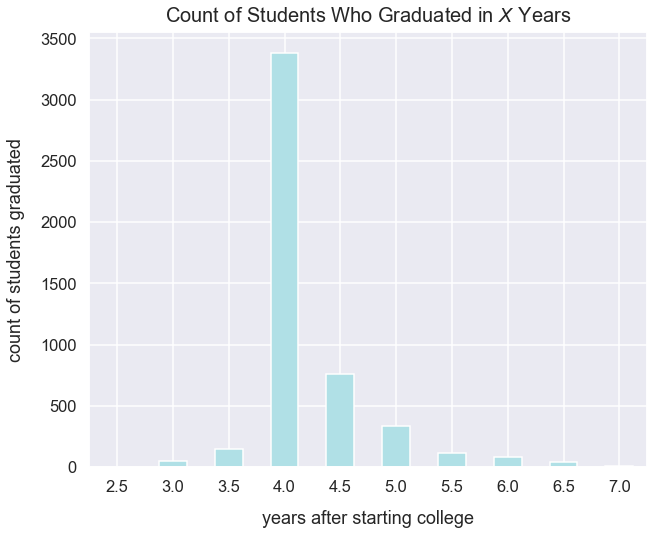

In [72]:
df.plot(kind='bar', x='years_after_starting_college', y='count_students_graduated', 
        figsize=(10, 8), legend=False, color='powderblue', rot=0);
plt.title("Count of Students Who Graduated in $X$ Years", y=1.01, fontsize=20)
plt.ylabel("count of students graduated", labelpad=15)
plt.xlabel("years after starting college", labelpad=15);

I find this visualization a bit confusing. With each bar, it's tough to understand the significance. So almost 3,000 students graduated in 4 years...is that good? How many students started 4 years ago? What percent of students is this from that start class?

I can answer these questions with a cumulative frequency graph. I must *cumulatively* add up the count of students that graduated - a term often called a **running total**.

In pandas, there's a `cumsum()` <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.cumsum.html'>method</a> that returns a cumulative sum over a column. I'll apply that to the `count_students_graduated` column.

In [73]:
df['count_students_graduated_running_total'] = df['count_students_graduated'].cumsum()

View our new `count_students_graduated_running_total` column.

In [74]:
df

,years_after_starting_college,count_students_graduated,count_students_graduated_running_total
0,2.5,5,5
1,3.0,50,55
2,3.5,150,205
3,4.0,3380,3585
4,4.5,760,4345
5,5.0,340,4685
6,5.5,115,4800
7,6.0,80,4880
8,6.5,40,4920
9,7.0,10,4930


I'd like to plot this new column as a line graph over time. This is a cumulative graph.

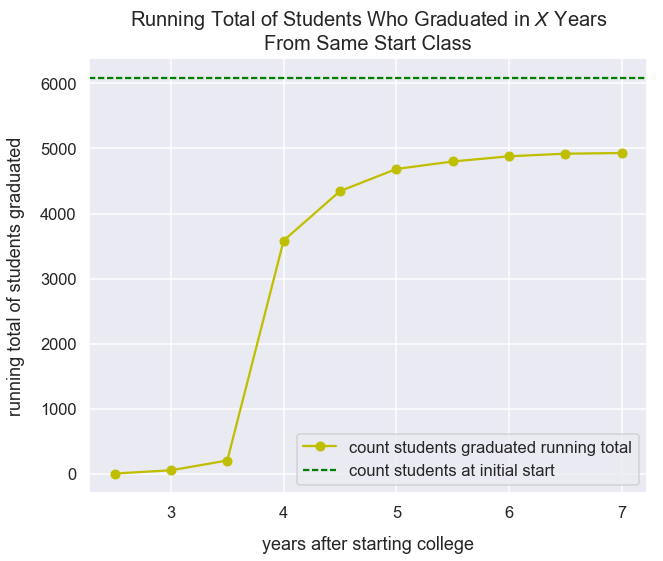

In [75]:
df.plot(x='years_after_starting_college', y='count_students_graduated_running_total', kind='line', 
        figsize=(10, 8), legend=False, style='yo-', label="count students graduated running total")
plt.axhline(y=count_students_at_class_start, color='green', linestyle='--', label='count students at initial start')
plt.title("Running Total of Students Who Graduated in $X$ Years\nFrom Same Start Class", y=1.01, fontsize=20)
plt.ylabel("running total of students graduated", labelpad=15)
plt.xlabel("years after starting college", labelpad=15)
plt.legend();

Another helpful visualization would be a cumulative percentage graph. To get this, for each value in the `count_students_graduated_running_total` colum, I need to figure out what percentage that value is of `count_students_at_class_start`. I can perform this calculation in pandas.

In [76]:
df['percent_students_graduated_of_total'] = df['count_students_graduated_running_total']/count_students_at_class_start*100

The visualization below shows the `percent_students_graduated_of_total` over the years. It's clear that 4 years in, almost 60% of students have graduated.

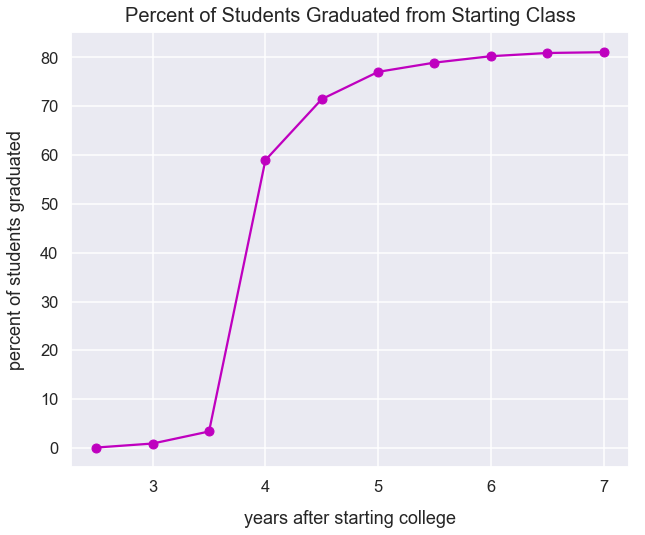

In [77]:
df.plot(x='years_after_starting_college', y='percent_students_graduated_of_total', kind='line', 
        figsize=(10, 8), legend=False, style='mo-')
plt.title("Percent of Students Graduated from Starting Class", y=1.01, fontsize=20)
plt.ylabel("percent of students graduated", labelpad=15)
plt.xlabel("years after starting college", labelpad=15);